## Project Phase II ##
#### Kerwin Chen ####
__Research Question:__ How have song lyrics changed over the decades (1960s-2010s)? <br>
I'm hoping to analyze trends and changes in lyrics, and also to create a regression model that can predict which decade a song is from based on its lyrics. 

In [1]:
import requests
import bs4
import numpy as np
import pandas as pd

There were two parts to my data collection. I first needed to scrape the names of songs of every year from 1960 to 2019 (data scraping pt 1), spanning a total of six decades (60s, 70s, 80s, 90s, 00s, 10s). The Billboard Hot 100 is a standard record chart in the music industry that tracks the most popular songs (through a point system that is a function of the song's sales), and release a year-end top 100 songs of the year every year. There is a website that's been keeping a record of these year-end hot 100s, which I decided to scrape. After scraping that, I used that as an input as a scraped Genius for lyrics via their API. Genius is an American digital media company that provides lyrics for many English and foreign language songs. 

### Data Collection Pt. I ###
Part one of data collection involves __scraping for the name of the song and its artist.__ On initial glance, the top 100 songs of each year seemed to be stored in an html table within appropriate tags and unique identifying tag attributes, all on a page with an easily generated URL. However, after initially naively scrapping every year from 1960 to 2019, I encountered multiple errors here and there. I decided to investigate each page more closely, and found out that the way the data was stored was grossly inconsistent across the years. I was hoping at a worst case scenario to need to scrape each decade individually, but it seems the differences were not dependent on decade. For example, in 2019 the data was stored within p tags, but 2018's data was each stored as an article element. Moreover, 2015 was stored within a table element, while 2013 didn't even have tags. This essentially forced me to check the html file for every single year by hand, and I kept an excel spreadsheet open to help me track how data is stored for each year. This made data collection part one take much much longer than anticipated. I was happy to find that there was consistency from 2012 to 1960 with data stored in rows of a table element, which meant that I could scrape that whole chunk together. For the exploratory analysis, I did not have time to scrap the years outside of 1960 to 2012, but I will in the future scrap 2013-2019 to complete the 2010s decade. 

In [138]:
decade = []
year = []
artist = []
song = []
years = list(range(1960,2013))
for i in years:
    site = "http://billboardtop100of.com/" + str(i) + "-2/"
    webpage = requests.get(site)
    soup = bs4.BeautifulSoup(webpage.text, 'html.parser')
    table = soup.findAll('tr')
    decade += [int(str(i)[:-1] + "0")] * 100
    year += [i] * 100
    artist += [i.text.split("\n")[2] for i in table]
    song += [i.text.split("\n")[3] for i in table]
    #comment below is my final failed attempt at scraping the entire 1960-2019 chunk before noticing the inconsistency
    #artist += [i.text.strip() for i in table if "id" in i.attrs and not i.text.strip().isnumeric()]
    #song += [i.text.strip() for i in table if i.attrs == {} and not i.text.isnumeric()]
    print('Done with', i) #allowed me to track the progress of the scraping

Done with 1960
Done with 1961
Done with 1962
Done with 1963
Done with 1964
Done with 1965
Done with 1966
Done with 1967
Done with 1968
Done with 1969
Done with 1970
Done with 1971
Done with 1972
Done with 1973
Done with 1974
Done with 1975
Done with 1976
Done with 1977
Done with 1978
Done with 1979
Done with 1980
Done with 1981
Done with 1982
Done with 1983
Done with 1984
Done with 1985
Done with 1986
Done with 1987
Done with 1988
Done with 1989
Done with 1990
Done with 1991
Done with 1992
Done with 1993
Done with 1994
Done with 1995
Done with 1996
Done with 1997
Done with 1998
Done with 1999
Done with 2000
Done with 2001
Done with 2002
Done with 2003
Done with 2004
Done with 2005
Done with 2006
Done with 2007
Done with 2008
Done with 2009
Done with 2010
Done with 2011
Done with 2012


In [139]:
print(len(decade), len(year), len(artist), len(song))

5300 5300 5300 5300


As suspected, each year should have 100 songs, giving us 1000 songs per decade with $2012 + 1 - 1960 = 53$ total years, resulting in a total of 5300 songs.

In [309]:
#1960-2012
top100 = pd.DataFrame({'decade': decade, 'year': year, 'artist':artist, 'song':song})
top100.to_csv('top100.csv') #stored data into dataframe and exported to csv

In [310]:
top100.head()

,decade,year,artist,song
0,1960,1960,Percy Faith,Theme From “A Summer Place”
1,1960,1960,Jim Reeves,He’ll Have To Go
2,1960,1960,Everly Brothers,Cathy’s Clown
3,1960,1960,Johnny Preston,Running Bear
4,1960,1960,Mark Dinning,Teen Angel


In [311]:
top100.tail()

,decade,year,artist,song
5295,2010,2012,Kip Moore,Somethin’ ‘Bout A Truck
5296,2010,2012,Miguel,Adorn
5297,2010,2012,Jason Aldean,Fly Over States
5298,2010,2012,Eli Young Band,Even If It Breaks Your Heart
5299,2010,2012,Linkin Park,Burn It Down


### Data Collection Pt. II ###
The second part of my data collection involves taking the list of songs I previously scrapped, and __finding the lyrics for each song.__ To do this, I had to sign up on Genius and make an account to obtain a unique authorization key to access their API. A data scientist named John W. Miller wrote a python package called lyricsgenius that wraps the Genius API, making it easier to download the song lyrics. I used this to get the lyrics of all the songs that I scraped from 1960-2012. I used a try-except block to handle cases were the song lyrics weren't found. This process ended up taking almost four hours to complete.

In [145]:
import lyricsgenius as lg
lyrics = []
genius = lg.Genius("JAlCQvWQxOy0Ertp8NhDj4wHzxBwc12vQiToA2HkRFqDHCLOBYTj0DjgrZCldg0f")
progress = 500
for i in range(len(top100.index)):
    locate_song = genius.search_song(top100["song"][i], top100["artist"][i])
    try:
        lyrics += [locate_song.lyrics]
    except AttributeError:
        lyrics += ["NONE"] #if error thrown (ie there is no lyrics), put "NONE" into the lyrics list
    if i % progress == 0:
        print("Done with", i, "songs") #allowed me to track the progress of the scraping
        progress += 500
print("Done with all songs")

Searching for "Theme From “A Summer Place”" by Percy Faith...
Done.
Done with 0 songs
Searching for "He’ll Have To Go" by Jim Reeves...
Done.
Searching for "Cathy’s Clown" by Everly Brothers...
Done.
Searching for "Running Bear" by Johnny Preston...
Done.
Searching for "Teen Angel" by Mark Dinning...
Done.
Searching for "I’m Sorry" by Brenda Lee...
Done.
Searching for "It’s Now Or Never" by Elvis Presley...
Done.
Searching for "Handy Man" by Jimmy Jones...
Done.
Searching for "Stuck On You" by Elvis Presley...
Done.
Searching for "The Twist" by Chubby Checker...
Done.
Searching for "Everybody’s Somebody’s Fool" by Connie Francis...
Done.
Searching for "Wild One" by Bobby Rydell...
Done.
Searching for "Greenfields" by Brothers Four...
Done.
Searching for "What In The World’s Come Over You" by Jack Scott...
Done.
Searching for "El Paso" by Marty Robbins...
Done.
Searching for "Alley-oop" by Hollywood Argyles...
Done.
Searching for "My Heart Has A Mind Of Its Own" by Connie Francis...
Don

Done.
Searching for "Without You" by Johnny Tillotson...
Done.
Searching for "Wings Of A Dove" by Ferlin Husky...
Done.
Searching for "Little Sister" by Elvis Presley...
Done.
Searching for "Blue Moon" by Marcels...
Done.
Searching for "Daddy’s Home" by Shep and The Limelites...
Done.
Searching for "This Time" by Troy Shondell...
Done.
Searching for "I Don’t Know Why But I Do" by Clarence “Frog Man” Henry...
Done.
Searching for "Asia Minor" by Kokomo...
Done.
Searching for "Hello Walls" by Faron Young...
Done.
Searching for "Runaround Sue" by Dion...
Done.
Searching for "Yellow Bird" by Arthur Lyman...
Done.
Searching for "Hurt" by Timi Yuro...
Done.
Searching for "Hello Mary Lou" by Ricky Nelson...
Done.
Searching for "There’s A Moon Out Tonight" by Capris...
Done.
Searching for "Surrender" by Elvis Presley...
Done.
Searching for "I Love How You Love Me" by Paris Sisters...
Done.
Searching for "Ya Ya" by Lee Dorsey...
Done.
Searching for "School Is Out" by Gary...
Done.
Searching for 

Done.
Searching for "Love Me Warm And Tender" by Paul Anka...
Done.
Searching for "Teen Age Idol" by Rick Nelson...
Done.
Searching for "She’s Got You" by Patsy Cline...
Done.
Searching for "Dear One" by Larry Finnegan...
Done.
Searching for "Her Royal Majesty" by James Darren...
Done.
Searching for "Old Rivers" by Walter Brennan...
Done.
Searching for "Funny Way Of Laughin’" by Burl Ives...
Done.
Searching for "A Swingin’ Safari" by Billy Vaughn...
Done.
Searching for "Tell Me" by Dick and Deedee...
Done.
Searching for "P.T. 109" by Jimmy Dean...
Done.
Searching for "Little Diane" by Dion...
Done.
Searching for "Percolator (Twist)" by Billy Joe and The Checkmates...
No results found for: 'Percolator (Twist) Billy Joe and The Checkmates'
Searching for "Twist, Twist Senora" by Gary U.S. Bonds...
Done.
Searching for "Twistin’ Matilda" by Jimmy Soul...
Done.
Searching for "Gravy" by Dee Dee Sharp...
Done.
Searching for "Walk On The Wild Side" by Jimmy Smith...
Done.
Searching for "Soul Tw

Done.
Searching for "Java" by Al Hirt...
Done.
Searching for "A Hard Day’s Night" by Beatles...
Done.
Searching for "Love Me Do" by Beatles...
Done.
Searching for "Do Wah Diddy Diddy" by Manfred Mann...
Done.
Searching for "Please Please Me" by Beatles...
Done.
Searching for "Dancing In The Street" by Martha and The Vandellas...
Done.
Searching for "Little Children" by Billy J. Kramer and The Dakotas...
Done.
Searching for "Love Me With All Your Heart" by Ray Charles Singers...
Done.
Searching for "Under The Boardwalk" by Drifters...
Done.
Searching for "Chapel Of Love" by Dixie Cups...
Done.
Searching for "Suspicion" by Terry Stafford...
Done.
Searching for "Glad All Over" by Dave Clark Five...
Done.
Searching for "Rag Doll" by Four Seasons...
Done.
Searching for "Dawn (Go Away)" by Four Seasons...
Done.
Searching for "Bread And Butter" by Newbeats...
Done.
Searching for "It Hurts To Be In Love" by Gene Pitney...
Done.
Searching for "Dead Man’s Curve" by Jan and Dean...
Done.
Searchin

Done.
Searching for "Seventh Son" by Johnny Rivers...
Done.
Searching for "I’m Henry VIII, I Am" by Herman’s Hermits...
Done.
Searching for "A Walk In The Black Forest" by Horst Jankowski...
Done.
Searching for "For Your Love" by Yardbirds...
Done.
Searching for "California Girls" by Beach Boys...
Done.
Searching for "Go Now" by Moody Blues...
Done.
Searching for "Goldfinger" by Shirley Bassey...
Done.
Searching for "Down In The Boondocks" by Billy Joe Royal...
Done.
Searching for "Baby The Rain Must Fall" by Glenn Yarbrough...
Done.
Searching for "Catch Us If You Can" by Dave Clark Five...
Done.
Searching for "Eight Days A Week" by Beatles...
Done.
Searching for "Just A Little" by Beau Brummels...
Done.
Searching for "You Turn Me On" by Ian Whitcomb...
Done.
Searching for "I’ll Be Doggone" by Marvin Gaye...
Done.
Searching for "Save Your Heart For Me" by Gary Lewis and The Playboys...
Done.
Searching for "Tired Of Waiting For You" by Kinks...
Done.
Searching for "Count Me In" by Gary 

Done.
Searching for "Don’t Mess With Bill" by Marvelettes...
Done.
Searching for "Cherry, Cherry" by Neil Diamond...
Done.
Searching for "Working In The Coal Mine" by Lee Dorsey...
Done.
Searching for "Message To Michael" by Dionne Warwick...
Done.
Searching for "Love Is A Hurtin’ Thing" by Lou Rawls...
Done.
Searching for "Barbara Ann" by Beach Boys...
Done.
Searching for "Gloria" by Shadows Of Knight...
Done.
Searching for "My World Is Empty Without You" by Supremes...
Done.
Searching for "Rainy Day Women #12 And 35" by Bob Dylan...
Done.
Searching for "Guantanamera" by Sandpipers...
Done.
Searching for "Land Of 1,000 Dances" by Wilson Pickett...
Done.
Searching for "Oh How Happy" by Shades Of Blue...
Done.
Searching for "Woman" by Peter and Gordon...
Done.
Searching for "You Baby" by Turtles...
Done.
Searching for "Five O’clock World" by Vogues...
Done.
Searching for "Black Is Black" by Los Bravos...
Done.
Searching for "Nowhere Man" by Beatles...
Done.
Searching for "Dandy" by Herm

Done.
Searching for "Mrs. Robinson" by Simon and Garfunkel...
Done.
Searching for "Tighten Up" by Archie Bell and The Drells...
Done.
Searching for "Harper Valley P.T.A." by Jeannie C. Riley...
Done.
Searching for "Little Green Apples" by O.C. Smith...
Done.
Searching for "Mony, Mony" by Tommy James and The Shondells...
Done.
Searching for "Hello, I Love You" by Doors...
Done.
Searching for "Young Girl" by Gary Puckett and The Union Gap...
Done.
Searching for "Cry Like A Baby" by Box Tops...
Done.
Searching for "Stoned Soul Picnic" by Fifth Dimension...
Done.
Searching for "Grazing In The Grass" by Hugh Masekela...
Done.
Searching for "Midnight Confessions" by Grass Roots...
Done.
Searching for "Dance To The Music" by Sly and The Family Stone...
Done.
Searching for "The Horse" by Cliff Nobles and Co....
Done.
Searching for "I Wish It Would Rain" by Temptations...
Done.
Searching for "La-La Means I Love You" by Delfonics...
Done.
Searching for "Turn Around, Look At Me" by Vogues...
Done

Done.
Searching for "Baby, Baby Don’t Cry" by Smokey Robinson and The Miracles...
Done.
Searching for "Only The Strong Survive" by Jerry Butler...
Done.
Searching for "Time Of The Season" by Zombies...
Done.
Searching for "Wedding Bell Blues" by Fifth Dimension...
Done.
Searching for "Little Woman" by Bobby Sherman...
Done.
Searching for "Love (Can Make You Happy)" by Mercy...
Done.
Searching for "Good Morning Starshine" by Oliver...
Done.
Searching for "These Eyes" by Guess Who...
Done.
Searching for "You’ve Made Me So Very Happy" by Blood, Sweat and Tears...
Done.
Searching for "Put A Little Love In Your Heart" by Jackie DeShannon...
Done.
Searching for "Do Your Thing" by Watts 103rd Street Rhythm Band...
Done.
Searching for "I’d Wait A Million Years" by Grass Roots...
Done.
Searching for "Touch Me" by Doors...
Done.
Searching for "More Today Than Yesterday" by Spiral Starecase...
Done.
Searching for "I’ve Gotta Be Me" by Sammy Davis Jr....
Done.
Searching for "Lay Lady Lay" by Bob D

Done.
Searching for "25 Or 6 To 4" by Chicago...
Done.
Searching for "My Baby Loves Lovin’" by White Plains...
Done.
Searching for "Love Or Let Me Be Lonely" by Friends Of Distinction...
Done.
Searching for "United We Stand" by Brotherhood Of Man...
Done.
Searching for "We’ve Only Just Begun" by Carpenters...
Done.
Searching for "Arizona" by Mark Lindsay...
Done.
Searching for "Fire And Rain" by James Taylor...
Done.
Searching for "Groovy Situation" by Gene Chandler...
Done.
Searching for "Evil Ways" by Santana...
Done.
Searching for "No Time" by Guess Who...
Done.
Searching for "Didn’t I (Blow Your Mind This Time)" by Delfonics...
Done.
Searching for "The Wonder Of You / Mama Liked The Roses" by Elvis Presley...
Done.
Searching for "Up Around The Bend / Run Through The Jungle" by Creedence Clearwater Revival...
No results found for: 'Up Around The Bend / Run Through The Jungle Creedence Clearwater Revival'
Searching for "(If You Let Me Make Love To You Then) Why Can’t I Touch You" by 

Done.
Searching for "Mama’s Pearl" by Jackson 5...
Done.
Searching for "Timothy" by Buoys...
Done.
Searching for "I Woke Up In Love This Morning" by Partridge Family...
Done.
Searching for "Theme From “Shaft”" by Isaac Hayes...
Done.
Searching for "If I Were Your Woman" by Gladys Knight and The Pips...
Done.
Searching for "I Am..I Said" by Neil Diamond...
Done.
Searching for "Wedding Song (There Is Love)" by Paul Stookey...
Done.
Searching for "Don’t Knock My Love, Pt. 1" by Wilson Pickett...
Done.
Searching for "Love Her Madly" by Doors...
Done.
Searching for "Here Comes The Sun" by Richie Havens...
Done.
Searching for "Sweet Mary" by Wadsworth Mansion...
Done.
Searching for "Right On The Tip Of My Tongue" by Brenda and The Tabulations...
Done.
Searching for "One Less Bell To Answer" by Fifth Dimension...
Done.
Searching for "Riders On The Storm" by Doors...
Done.
Searching for "It’s Impossible" by Perry Como...
Done.
Searching for "The First Time Ever I Saw Your Face" by Roberta Flac

Done.
Searching for "You Are The Sunshine Of My Life" by Stevie Wonder...
Done.
Searching for "Half Breed" by Cher...
Done.
Searching for "That Lady" by Isley Bros....
Done.
Searching for "Pillow Talk" by Sylvia...
Done.
Searching for "We’re An American Band" by Grand Funk Railroad...
Done.
Searching for "Right Place, Wrong Time" by Dr. John...
Done.
Searching for "Wildflower" by Skylark...
Done.
Searching for "Superstition" by Stevie Wonder...
Done.
Searching for "Loves Me Like A Rock" by Paul Simon...
Done.
Searching for "The Morning After" by Maureen McGovern...
Done.
Searching for "Rocky Mountain High" by John Denver...
Done.
Searching for "Stuck In The Middle With You" by Stealers Wheel...
Done.
Searching for "Shambala" by Three Dog Night...
Done.
Searching for "Love Train" by O’Jays...
Done.
Searching for "I’m Gonna Love You Just A Little More" by Barry White...
Done.
Searching for "Say, Has Anybody Seen My Sweet Gypsy Rose" by Tony Orlando and Dawn...
Done.
Searching for "Keep O

Done.
Searching for "Rikki Don’t Lose That Number" by Steely Dan...
Done.
Searching for "Mockingbird" by Carly Simon...
Done.
Searching for "Help Me" by Joni Mitchell...
Done.
Searching for "You Won’t See Me" by Anne Murray...
Done.
Searching for "Never, Never Gonna Give You Up" by Barry White...
Done.
Searching for "Tell Me Something Good" by Rufus...
Done.
Searching for "You And Me Against The World" by Helen Reddy...
Done.
Searching for "Rock And Roll Heaven" by Righteous Brothers...
Done.
Searching for "Hollywood Swinging" by Kool and The Gang...
Done.
Searching for "Be Thankful For What You Got" by William Devaughn...
Done.
Searching for "Hang On In There Baby" by Johnny Bristol...
Done.
Searching for "Eres Tú (Touch The Wind)" by Mocedades...
Done.
Searching for "Takin’ Care Of Business" by Bachman-Turner Overdrive...
Done.
Searching for "Radar Love" by Golden Earring...
Done.
Searching for "Please Come To Boston" by Dave Loggins...
Done.
Searching for "Keep On Smilin’" by Wet Wi

Done.
Searching for "Can’t Get It Out Of My Head" by Electric Light Orchestra...
Done.
Searching for "Sha-La-La (Make Me Happy)" by Al Green...
Done.
Searching for "Lonely People" by America...
Done.
Searching for "You Got The Love" by Rufus...
Done.
Searching for "The Rockford Files" by Mike Post...
Done.
Searching for "It Only Takes A Minute" by Tavares...
Done.
Searching for "No No Song / Snookeroo" by Ringo Starr...
Specified song does not contain lyrics. Rejecting.
Searching for "Junior’s Farm / Sally G" by Paul McCartney and Wings...
Done.
Searching for "Bungle In The Jungle" by Jethro Tull...
Done.
Searching for "Long Tall Glasses (I Can Dance)" by Leo Sayer...
Done.
Searching for "Someone Saved My Life Tonight" by Elton John...
Done.
Searching for "Misty" by Ray Stevens...
Done.
Searching for "Bad Blood" by Neil Sedaka...
Done.
Searching for "Only Yesterday" by Carpenters...
Done.
Searching for "I’m On Fire" by Dwight Twilley Band...
Done.
Searching for "Only You" by Ringo Star

Done.
Searching for "Dancing Queen" by ABBA...
Done.
Searching for "You Make Me Feel Like Dancing" by Leo Sayer...
Done.
Searching for "Margaritaville" by Jimmy Buffett...
Done.
Searching for "Telephone Line" by Electric Light Orchestra...
Done.
Searching for "Whatcha Gonna Do?" by Pablo Cruise...
Done.
Searching for "Do You Wanna Make Love" by Peter McCann...
Done.
Searching for "Sir Duke" by Stevie Wonder...
Done.
Searching for "Hotel California" by Eagles...
Done.
Searching for "Got To Give It Up, Pt. 1" by Marvin Gaye...
Done.
Searching for "Theme From “Rocky” (Gonna Fly Now)" by Bill Conti...
Done.
Searching for "Southern Nights" by Glen Campbell...
Done.
Searching for "Rich Girl" by Daryl Hall and John Oates...
Done.
Searching for "When I Need You" by Leo Sayer...
Done.
Searching for "Hot Line" by Sylvers...
Done.
Searching for "Car Wash" by Rose Royce...
Done.
Searching for "You Don’t Have To Be A Star" by Marilyn McCoo and Billy Davis Jr....
Done.
Searching for "Fly Like An Eag

Done.
Searching for "Goodbye Girl" by David Gates...
Done.
Searching for "Slip Slidin’ Away" by Paul Simon...
Done.
Searching for "The Groove Line" by Heatwave...
Done.
Searching for "Thunder Island" by Jay Ferguson...
Done.
Searching for "Imaginary Lover" by Atlanta Rhythm Section...
Done.
Searching for "Still The Same" by Bob Seger and The Silver Bullet Band...
Done.
Searching for "My Angel Baby" by Toby Beau...
Done.
Searching for "Disco Inferno" by Trammps...
Done.
Searching for "On Broadway" by George Benson...
Done.
Searching for "Come Sail Away" by Styx...
Done.
Searching for "Back In Love Again" by L.T.D....
Done.
Searching for "This Time I’m In It For Love" by Player...
Done.
Searching for "You Belong To Me" by Carly Simon...
Done.
Searching for "Here You Come Again" by Dolly Parton...
Done.
Searching for "Blue Bayou" by Linda Ronstadt...
Done.
Searching for "Peg" by Steely Dan...
Done.
Searching for "You Needed Me" by Anne Murray...
Done.
Searching for "Shame" by Evelyn “Cham

Done.
Searching for "You Take My Breath Away" by Rex Smith...
Done.
Searching for "How You Gonna See Me Now" by Alice Cooper...
Done.
Searching for "Double Vision" by Foreigner...
Done.
Searching for "Every Time I Think Of You" by Babys...
Done.
Searching for "I Got My Mind Made Up" by Instant Funk...
Done.
Searching for "Don’t Stop ‘Til You Get Enough" by Michael Jackson...
Done.
Searching for "Bad Case Of Lovin’ You" by Robert Palmer...
Done.
Searching for "Somewhere In The Night" by Barry Manilow...
Done.
Searching for "We’ve Got Tonight" by Bob Seger and The Silver Bullet Band...
Done.
Searching for "Dance The Night Away" by Van Halen...
Done.
Searching for "Dancing Shoes" by Nigel Olsson...
Done.
Searching for "The Boss" by Diana Ross...
Done.
Searching for "Sail On" by Commodores...
Done.
Searching for "I Do Love You" by G.Q....
Done.
Searching for "Strange Way" by Firefall...
Done.
Searching for "Call Me" by Blondie...
Done.
Done with 2000 songs
Searching for "Another Brick In T

Done.
Searching for "Sukiyaki" by A Taste Of Honey...
Done.
Searching for "The Winner Takes It All" by ABBA...
Done.
Searching for "Medley" by Stars On 45...
Done.
Searching for "Angel Of The Morning" by Juice Newton...
Done.
Searching for "Love On The Rocks" by Neil Diamond...
Done.
Searching for "Every Woman In The World" by Air Supply...
Done.
Searching for "The One That You Love" by Air Supply...
Done.
Searching for "Guilty" by Barbra Streisand and Barry Gibb...
Done.
Searching for "The Best Of Times" by Styx...
Done.
Searching for "Elvira" by Oak Ridge Boys...
Done.
Searching for "Take It On The Run" by REO Speedwagon...
Done.
Searching for "No Gettin’ Over Me" by Ronnie Milsap...
Done.
Searching for "Living Outside Myself" by Gino Vannelli...
No results found for: 'Living Outside Myself Gino Vannelli'
Searching for "Woman In Love" by Barbra Streisand...
Done.
Searching for "Boy From New York City" by Manhattan Transfer...
Done.
Searching for "Urgent" by Foreigner...
Done.
Searchi

Done.
Searching for "Think I’m In Love" by Eddie Money...
Done.
Searching for "Love Is In Control" by Donna Summer...
Done.
Searching for "Personally" by Karla Bonoff...
Done.
Searching for "Owe Hundred Ways" by Quincy Jones...
No results found for: 'Owe Hundred Ways Quincy Jones'
Searching for "Blue Eyes" by Elton John...
Done.
Searching for "Our Lips Are Sealed" by Go-Go’s...
Done.
Searching for "You Could Have Been Wih Me" by Sheena Easton...
No results found for: 'You Could Have Been Wih Me Sheena Easton'
Searching for "You Can Do Magic" by America...
Done.
Searching for "Did It In A Minute" by Daryl Hall and John Oates...
Done.
Searching for "I Ran" by A Flock Of Seagulls...
Done.
Searching for "Somebody’s Baby" by Jackson Browne...
Done.
Searching for "Oh No" by Commodores...
Done.
Searching for "Take It Away" by Paul McCartney...
Done.
Searching for "It’s Gonna Take A Miracle" by Deneice Williams...
Done.
Searching for "Love Will Turn You Around" by Kenny Rogers...
Done.
Searchi

Done.
Searching for "Tonight I Celebrate My Love" by Peabo Bryson and Roberta Flack...
Done.
Searching for "You Got Lucky" by Tom Petty and The Heartbreakers...
Done.
Searching for "Don’t Cry" by Asia...
Done.
Searching for "Breaking Us In Two" by Joe Jackson...
Done.
Searching for "Fall In Love With Me" by Earth, Wind and Fire...
Done.
Searching for "When Doves Cry" by Prince...
Done.
Searching for "What’s Love Got To Do With It" by Tina Turner...
Done.
Searching for "Say Say Say" by Paul McCartney and Michael Jackson...
Done.
Searching for "Footloose" by Kenny Loggins...
Done.
Searching for "Against All Odds (Take A Look At Me Now)" by Phil Collins...
Done.
Searching for "Jump" by Van Halen...
Done.
Searching for "Hello" by Lionel Richie...
Done.
Searching for "Owner Of A Lonely Heart" by Yes...
Done.
Searching for "Ghostbusters" by Ray Parker Jr....
Done.
Searching for "Karma Chameleon" by Culture Club...
Done.
Searching for "Missing You" by John Waite...
Done.
Searching for "All Ni

Done.
Searching for "One More Night" by Phil Collins...
Done.
Searching for "Sea Of Love" by Honeydrippers...
Done.
Searching for "A View To A Kill" by Duran Duran...
Done.
Searching for "The Wild Boys" by Duran Duran...
Done.
Searching for "You’re The Inspiration" by Chicago...
Done.
Searching for "Neutron Dance" by Pointer Sisters...
Done.
Searching for "We Belong" by Pat Benatar...
Done.
Searching for "Nightshift" by Commodores...
Done.
Searching for "Things Can Only Get Better" by Howard Jones...
Done.
Searching for "All I Need" by Jack Wagner...
Done.
Searching for "Freeway Of Love" by Aretha Franklin...
Done.
Searching for "Never Surrender" by Corey Hart...
Done.
Searching for "Sussudio" by Phil Collins...
Done.
Searching for "Strut" by Sheena Easton...
Done.
Searching for "You Give Good Love" by Whitney Houston...
Done.
Searching for "The Search Is Over" by Survivor...
Done.
Searching for "Missing You" by Diana Ross...
Done.
Searching for "Separate Lives" by Phil Collins and Mar

Done.
Searching for "Sweet Freedom" by Michael McDonald...
Done.
Searching for "True Blue" by Madonna...
Done.
Searching for "Rumors" by Timex Social Club...
Done.
Searching for "Life In A Northern Town" by Dream Academy...
Done.
Searching for "Bad Boy" by Miami Sound Machine...
Done.
Searching for "Sleeping Bag" by ZZ Top...
Done.
Searching for "Tonight She Comes" by Cars...
Done.
Searching for "Love Touch" by Rod Stewart...
Done.
Searching for "A Love Bizarre" by Sheila E....
Done.
Searching for "Throwing It All Away" by Genesis...
Done.
Searching for "Baby Love" by Regina...
Done.
Searching for "Election Day" by Arcadia...
Done.
Searching for "Nikita" by Elton John...
Done.
Searching for "Take Me Home" by Phil Collins...
Done.
Searching for "Walk This Way" by Run-D.M.C....
Done.
Searching for "Sweet Love" by Anita Baker...
Done.
Searching for "Your Wildest Dreams" by Moody Blues...
Done.
Searching for "Spies Like Us" by Paul McCartney...
Done.
Searching for "Object Of My Desire" by 

Done.
Searching for "Seasons Change" by Expose...
Done.
Searching for "Is This Love" by Whitesnake...
Done.
Searching for "Wild, Wild West" by Escape Club...
Done.
Searching for "Pour Some Sugar On Me" by Def Leppard...
Done.
Searching for "I’ll Always Love You" by Taylor Dayne...
Done.
Searching for "Man In The Mirror" by Michael Jackson...
Done.
Searching for "Shake Your Love" by Debbie Gibson...
Done.
Searching for "Simply Irresistible" by Robert Palmer...
Done.
Searching for "Hold On To The Nights" by Richard Marx...
Done.
Searching for "Hungry Eyes" by Eric Carnen...
Done.
Searching for "Shattered Dreams" by Johnny Hates Jazz...
Done.
Searching for "Father Figure" by George Michael...
Done.
Searching for "Naughty Girls (Need Love Too)" by Samantha Fox...
Done.
Searching for "A Groovy Kind Of Love" by Phil Collins...
Done.
Searching for "Love Bites" by Def Leppard...
Done.
Searching for "Endless Summer Nights" by Richard Marx...
Done.
Searching for "Foolish Beat" by Debbie Gibson..

Done.
Searching for "Satisfied" by Richard Marx...
Done.
Searching for "Express Yourself" by Madonna...
Done.
Searching for "I Like It" by Dino...
Done.
Searching for "Soldier Of Love" by Donny Osmond...
Done.
Searching for "Sowing The Seeds Of Love" by Tears For Fears...
Done.
Searching for "Cherish" by Madonna...
Done.
Searching for "When The Children Cry" by White Lion...
Done.
Searching for "18 And Life" by Skid Row...
Done.
Searching for "I Don’t Want Your Love" by Duran Duran...
Done.
Searching for "Second Chances" by .38 Special...
Done.
Searching for "The Way You Love Me" by Karyn White...
Done.
Searching for "Funky Cold Medina" by Tone Loc...
Done.
Searching for "In Your Room" by Bangles...
Done.
Searching for "Miss You Like Crazy" by Natalie Cole...
Done.
Searching for "Love Song" by Cure...
Done.
Searching for "Secret Rendesvous" by Karyn White...
Done.
Searching for "Angel Eyes" by Jeff Healey Band...
Done.
Searching for "Patience" by Guns N’ Roses...
Done.
Searching for "W

Done.
Searching for "Swing The Mood" by Jive Bunny and The Master Mixers...
Done.
Searching for "Thieves In The Temple" by Prince...
Done.
Searching for "Mentirosa" by Mellow Man Ace...
Done.
Searching for "Tic-Tac-Toe" by Kyper...
Done.
Searching for "(Everything I Do) I Do It For You" by Bryan Adams...
Done.
Searching for "I Wanna Sex You Up" by Color Me Badd...
Done.
Searching for "Gonna Make You Sweat" by C+C Music Factory...
Done.
Searching for "Rush Rush" by Paula Abdul...
Done.
Searching for "One More Try" by Timmy T...
Done.
Searching for "Unbelievable" by EMF...
Done.
Searching for "More Than Words" by Extreme...
Done.
Searching for "I Like The Way (The Kissing Game)" by Hi-Five...
Done.
Searching for "The First Time" by Surface...
Done.
Searching for "Baby, Baby" by Amy Grant...
Done.
Searching for "Motownphilly" by Boyz II Men...
Done.
Searching for "Because I Love You (The Postman Song)" by Stevie B...
Done.
Searching for "Someday" by Mariah Carey...
Done.
Searching for "Hi

Done.
Searching for "Ain’t 2 Proud 2 Beg" by TLC...
Done.
Searching for "It’s So Hard To Say Goodbye To Yesterday" by Boyz II Men...
Done.
Searching for "Move This" by Technotronic...
Done.
Searching for "Bohemian Rhapsody" by Queen...
Done.
Searching for "Tennessee" by Arrested Development...
Done.
Searching for "The Best Things In Life Are Free" by Luther Vandross and Janet Jackson...
Done.
Searching for "Make It Happen" by Mariah Carey...
Done.
Searching for "The One" by Elton John...
Done.
Searching for "Set Adrift On Memory Bliss" by P.M. Dawn...
Done.
Searching for "Stay" by Shakespear’s Sister...
Done.
Searching for "2 Legit 2 Quit" by Hammer...
Done.
Searching for "Please Don’t Go" by K.W.S....
Done.
Searching for "Breakin’ My Heart (Pretty Brown Eyes)" by Mint Condition...
Done.
Searching for "Wishing On A Star" by Cover Girls...
Done.
Searching for "She’s Playing Hard To Get" by Hi-Five...
Done.
Searching for "I’d Die Without You" by P.M. Dawn...
Done.
Searching for "Good For

Done.
Searching for "It Was A Good Day" by Ice Cube...
Done.
Searching for "More And More" by Captain Hollywood Project...
Done.
Searching for "How Do You Talk To An Angel" by Heights...
Done.
Searching for "Rebirth Of Slick (Cool Like Dat)" by Digable Planets...
Done.
Searching for "What Is Love" by Haddaway...
Done.
Searching for "To Love Somebody" by Michael Bolton...
Done.
Searching for "Give It Up, Turn It Loose" by En Vogue...
Done.
Searching for "Alright" by Kris Kross...
Done.
Searching for "Check Yo Self" by Ice Cube...
Done.
Searching for "Fields Of Gold" by Sting...
Done.
Searching for "Ooh Child" by Dino...
Done.
Searching for "Faithful" by Go West...
Done.
Searching for "Reason To Believe" by Rod Stewart...
Done.
Searching for "Break It Down Again" by Tears For Fears...
Done.
Searching for "Nothin’ My Love Can’t Fix" by Joey Lawrence...
Done.
Searching for "Three Little Pigs" by Green Jelly...
Done.
Searching for "Livin’ On The Edge" by Aerosmith...
Done.
Searching for "He

Done.
Searching for "Hold My Hand" by Hootie and The Blowfish...
Done.
Searching for "One More Chance-Stay With Me" by Notorious B.I.G....
Done.
Searching for "Here Comes The Hotstepper" by Ini Kamoze...
Done.
Searching for "Candy Rain" by Soul For Real...
Done.
Searching for "Let Her Cry" by Hootie and The Blowfish...
Done.
Searching for "I Believe" by Blessid Union Of Souls...
Done.
Searching for "Red Light Special" by TLC...
Done.
Searching for "Runaway" by Janet Jackson...
Done.
Searching for "Strong Enough" by Sheryl Crow...
Done.
Searching for "Colors Of The Wind" by Vanessa Williams...
Done.
Searching for "Someone To Love" by Jon B....
Done.
Searching for "Only Wanna Be With You" by Hootie and The Blowfish...
Done.
Searching for "If You Love Me" by Brownstone...
Done.
Searching for "In The House Of Stone And Light" by Martin Page...
Done.
Searching for "I Got 5 On It" by Luniz...
Done.
Searching for "Baby" by Brandy...
Done.
Searching for "Run Away" by Real McCoy...
Done.
Search

Done.
Searching for "Wonderwall" by Oasis...
Done.
Searching for "Woo-hah!! Got You All In Check / Everything Remains Raw" by Busta Rhymes...
No results found for: 'Woo-hah!! Got You All In Check / Everything Remains Raw Busta Rhymes'
Searching for "Tell Me" by Groove Theory...
Done.
Searching for "Elevators (Me & You)" by Outkast...
Done.
Searching for "Hook" by Blues Traveler...
Done.
Searching for "Doin It" by LL Cool J...
Done.
Searching for "Fastlove" by George Michael...
Done.
Searching for "Touch Me Tease Me" by Case feat. Foxxy Brown...
Done.
Searching for "Tonite’s Tha Night" by Kris Kross...
Done.
Searching for "Children" by Robert Miles...
Done.
Searching for "Theme From Mission: Impossible" by Adam Clayton and Larry Mullen...
Done.
Searching for "Closer To Free" by Bodeans...
Done.
Searching for "Just A Girl" by No Doubt...
Done.
Searching for "If Your Girl Only Knew" by Aaliyah...
Done.
Searching for "Lady" by D’angelo...
Done.
Searching for "Key West Intermezzo (I Saw You

Done.
Searching for "Barbie Girl" by Aqua...
Done.
Searching for "When You’re Gone / Free To Decide" by Cranberries...
Done.
Searching for "Let Me Clear My Throat" by DJ Kool...
Done.
Searching for "I Like It" by Blackout Allstars...
Done.
Searching for "You’re Makin’ Me High / Let It Flow" by Toni Braxton...
Done.
Searching for "You Must Love Me" by Madonna...
Done.
Searching for "Let It Go" by Ray J...
Done.
Searching for "Too Close" by Next...
Done.
Searching for "The Boy Is Mine" by Brandy and Monica...
Done.
Searching for "You’re Still The One" by Shania Twain...
Done.
Searching for "Truly Madly Deeply" by Savage Garden...
Done.
Searching for "How Do I Live" by LeAnn Rimes...
Done.
Searching for "Together Again" by Janet...
Done.
Searching for "All My Life" by K-Ci and JoJo...
Done.
Searching for "Candle In The Wind 1997" by Elton John...
Done.
Searching for "Nice & Slow" by Usher...
Done.
Searching for "I Don’t Want To Wait" by Paula Cole...
Done.
Searching for "How’s It Going To

Done.
Searching for "The Hardest Thing" by 98 Degrees...
Done.
Searching for "Summer Girls" by LFO...
Done.
Searching for "Can I Get A…" by Jay-Z feat. Amil (Of Major Coinz) and Ja...
No results found for: 'Can I Get A… Jay-Z feat. Amil (Of Major Coinz) and Ja'
Searching for "Jumper" by Third Eye Blind...
Done.
Searching for "Doo Wop (That Thing)" by Lauryn Hill...
Done.
Searching for "Mambo No. 5 (A Little Bit Of…)" by Lou Bega...
Done.
Searching for "Sweet Lady" by Tyrese...
Done.
Searching for "It’s Not Right But It’s Okay" by Whitney Houston...
Done.
Searching for "(God Must Have Spent) A Little More Time On You" by ‘N Sync...
Done.
Searching for "Lullaby" by Shawn Mullins...
Done.
Searching for "Anywhere" by 112 feat. Lil’Z...
Done.
Searching for "Tell Me It’s Real" by K-Ci and JoJo...
Done.
Searching for "Back 2 Good" by Matchbox 20...
Done.
Searching for "808" by Blaque...
Done.
Searching for "She’s So High" by Tal Bachman...
Done.
Searching for "She’s All I Ever Had" by Ricky M

Done.
Searching for "Case Of The Ex (Whatcha Gonna Do)" by Mya...
Done.
Searching for "Forget About Dre" by Dr. Dre feat. Eminem...
Done.
Searching for "That’s The Way" by Jo Dee Messina...
Done.
Searching for "Swear It Again" by Westlife...
Done.
Searching for "The Next Episode" by Dr. Dre feat. Snoop Dogg...
Done.
Searching for "From The Bottom Of My Broken Heart" by Britney Spears...
Done.
Searching for "Crash And Burn" by Savage Garden...
Done.
Searching for "Yes!" by Chad Brock...
Done.
Searching for "The Best Day" by George Strait...
Done.
Searching for "Where I Wanna Be" by Donell Jones...
Done.
Searching for "How Do You Like Me Now?!" by Toby Keith...
Done.
Searching for "My Best Friend" by Tim McGraw...
Done.
Searching for "Broadway" by Goo Goo Dolls...
Done.
Searching for "What’chu Like" by Da Brat feat. Tyrese...
Done.
Searching for "Don’t Think I’m Not" by Kandi...
Done.
Searching for "I Hope You Dance" by Lee Ann Womack and Sons Of The Desert...
Done.
Searching for "Better

Done.
Searching for "Blurry" by Puddle Of Mudd...
Done.
Searching for "Complicated" by Avril Lavigne...
Done.
Searching for "Always on Time" by Ja Rule feat. Ashanti...
Done.
Searching for "Ain’t it Funny" by Jennifer Lopez feat. Ja Rule...
Done.
Searching for "The Middle" by Jimmy Eat World...
Done.
Searching for "I Need a Girl (Part One)" by P. Diddy feat. Usher and Loon...
Done.
Searching for "U Don’t have to Call" by Usher...
Done.
Searching for "Family Affair" by Mary J. Blige...
Done.
Searching for "I Need a Girl (Part Two)" by P. Diddy and Ginuwine feat. Loon, Mario Winans and Tammy Ruggeri...
No results found for: 'I Need a Girl (Part Two) P. Diddy and Ginuwine feat. Loon, Mario Winans and Tammy Ruggeri'
Searching for "Gangsta Lovin’" by Eve feat. Alicia Keys...
Done.
Searching for "My Sacrifice" by Creed...
Done.
Searching for "Without Me" by Eminem...
Done.
Searching for "Hero" by Enrique Iglesias...
Done.
Searching for "All You Wanted" by Michelle Branch...
Done.
Searching f

Done.
Searching for "Air Force Ones" by Nelly feat. Kyjuan, Ali and Murphy Lee...
Done.
Searching for "Never Leave You – Uh Ooh, Uh Oooh!" by Lumidee...
No results found for: 'Never Leave You – Uh Ooh, Uh Oooh! Lumidee'
Searching for "Beautiful" by Snoop Dogg feat. Pharrell and Uncle Charlie Wilson...
Done.
Searching for "Gossip Folks" by Missy “Misdemeanor” Elliott feat. Ludacris...
Done.
Searching for "Miss Independent" by Kelly Clarkson...
Done.
Searching for "Calling All Angels" by Train...
Done.
Searching for "Damn!" by YoungBloodZ feat. Lil Jon...
Done.
Searching for "This is the Night" by Clay Aiken...
Done.
Searching for "Your Body is a Wonderland" by John Mayer...
Done.
Searching for "Headstrong" by Trapt...
Done.
Searching for "In those Jeans" by Ginuwine...
Done.
Searching for "Stand Up" by Ludacris feat. Shawnna...
Done.
Searching for "The Remedy (I won’t Worry)" by Jason Mraz...
Done.
Searching for "Why Don’t You & I" by Santana feat. Alex Band Or Chad Kroeger...
No result

Done.
Searching for "Breakaway" by Kelly Clarkson...
Done.
Searching for "Why Don’t you & I" by Santana feat. Alex Band Or Chad Kroeger...
No results found for: 'Why Don’t you & I Santana feat. Alex Band Or Chad Kroeger'
Searching for "Are You Gonna Be My Girl" by Jet...
Done.
Searching for "100 Years" by Five For Fighting...
Done.
Searching for "Step In The Name Of Love" by R. Kelly...
Done.
Searching for "Breaking the Habit" by Linkin Park...
Done.
Searching for "Gigolo" by Nick Cannon feat. R. Kelly...
Done.
Searching for "Live Like You Were Dying" by Tim McGraw...
Done.
Searching for "Remember When" by Alan Jackson...
Done.
Searching for "Everytime" by Britney Spears...
Done.
Searching for "Southside" by Lloyd feat. Ashanti...
Done.
Searching for "Dude" by Beenie Man feat. Ms. Thing...
Done.
Searching for "Wanna Get To Know You" by G-Unit feat. Joe...
Done.
Searching for "Holidae In" by Chingy feat. Ludacris and Snoop Dogg...
Done.
Searching for "Let’s Get It Started" by Black Eyed

Done.
Searching for "Be without You" by Mary J. Blige...
Done.
Searching for "Grillz" by Nelly feat. Paul Wall, Ali and Gipp...
Done.
Searching for "Over My Head (Cable Car)" by The Fray...
Done.
Searching for "Me & U" by Cassie...
Done.
Searching for "Buttons" by The Pussycat Dolls feat. Snoop Dogg...
Done.
Searching for "Run It!" by Chris Brown...
Done.
Searching for "So Sick" by Ne-Yo...
Done.
Searching for "It’s Goin’ Down" by Yung Joc...
Done.
Searching for "SOS" by Rihanna...
Done.
Searching for "I Write Sins not Tragedies" by Panic! At The Disco...
Done.
Searching for "Move Along" by The All-American Rejects...
Done.
Searching for "London Bridge" by Fergie...
Done.
Searching for "Dani California" by Red Hot Chili Peppers...
Done.
Searching for "Snap Yo Fingers" by Lil Jon feat. E-40 and Sean Paul Of The YoungBloodZ...
No results found for: 'Snap Yo Fingers Lil Jon feat. E-40 and Sean Paul Of The YoungBloodZ'
Searching for "Lean Wit It, Rock Wit It" by Dem Franchize Boyz feat. Li

Done.
Searching for "Last Night" by Diddy feat. Keyshia Cole...
Done.
Searching for "Make It Rain" by Fat Joe feat. Lil Wayne...
Done.
Searching for "Make Me Better" by Fabolous feat. Ne-Yo...
Done.
Searching for "Ice Box" by Omarion...
Done.
Searching for "Lips Of An Angel" by Hinder...
Done.
Searching for "Waiting On The World To Change" by John Mayer...
Done.
Searching for "Lost Without U" by Robin Thicke...
Done.
Searching for "I’m A Flirt" by R. Kelly Or Bow Wow (feat. T.I. & T-Pain)...
No results found for: 'I’m A Flirt R. Kelly Or Bow Wow (feat. T.I. & T-Pain)'
Searching for "If Everyone Cared" by Nickelback...
Done.
Searching for "Get It Shawty" by Lloyd...
Done.
Searching for "Face Down" by The Red Jumpsuit Apparatus...
Done.
Searching for "The Way I Live" by Baby Boy Da Prince feat. Lil Boosie...
No results found for: 'The Way I Live Baby Boy Da Prince feat. Lil Boosie'
Searching for "Shortie Like Mine" by Bow Wow feat. Chris Brown & Johnta Austin...
Done.
Searching for "It E

Done.
Searching for "Hypnotized" by Plies feat. Akon...
Done.
Searching for "Big Girls Don’t Cry" by Fergie...
Done.
Searching for "Good Life" by Kanye West feat. T-Pain...
Done.
Searching for "Womanizer" by Britney Spears...
Done.
Searching for "Love Story" by Taylor Swift...
Done.
Searching for "Just Fine" by Mary J. Blige...
Done.
Searching for "Piece Of Me" by Britney Spears...
Done.
Searching for "The Boss" by Rick Ross feat. T-Pain...
Done.
Searching for "All Summer Long" by Kid Rock...
Done.
Searching for "Can’t Help But Wait" by Trey Songz...
Done.
Searching for "In Love With A Girl" by Gavin DeGraw...
Done.
Searching for "My Life" by The Game feat. Lil Wayne...
Done.
Searching for "I Remember" by Keyshia Cole...
Done.
Searching for "Flashing Lights" by Kanye West feat. Dwele...
Done.
Searching for "Mrs. Officer" by Lil Wayne feat. Bobby Valentino & Kidd Kidd...
Done.
Searching for "7 Things" by Miley Cyrus...
Done.
Searching for "You’re Gonna Miss This" by Trace Adkins...
Done

Done.
Searching for "Teenage Dream" by Katy Perry...
Done.
Searching for "Just The Way You Are" by Bruno Mars...
Done.
Searching for "Cooler Than Me" by Mike Posner...
Done.
Searching for "Imma Be" by Black Eyed Peas...
Done.
Searching for "Empire State of Mind" by Jay-Z and Alicia Keys...
Done.
Searching for "DJ Got Us Fallin’ in Love" by Usher feat. Pitbull...
Done.
Searching for "Billionaire" by Travie McCoy feat. Bruno Mars...
Done.
Searching for "Not Afraid" by Eminem...
Done.
Searching for "Replay" by Iyaz...
Done.
Searching for "Sexy Chick" by David Guetta feat. Akon...
Done.
Searching for "Breakeven" by The Script...
Done.
Searching for "Your Love Is My Drug" by Ke$ha...
Done.
Searching for "I Gotta Feeling" by Black Eyed Peas...
Done.
Searching for "Fireflies" by Owl City...
Done.
Searching for "Say Aah" by Trey Songz feat. Fabolous...
Done.
Searching for "Find Your Love" by Drake...
Done.
Searching for "Alejandro" by Lady Gaga...
Done.
Searching for "Ridin’ Solo" by Jason Der

Done.
Searching for "Just A Dream" by Nelly...
Done.
Searching for "Motivation" by Kelly Rowland feat. Lil Wayne...
Done.
Searching for "Stereo Love" by Edward Maya & Vika Jigulina...
Done.
Searching for "Jar Of Hearts" by Christina Perri...
Done.
Searching for "Roll Up" by Wiz Khalifa...
Done.
Searching for "Sexy And I Know It" by LMFAO...
Done.
Searching for "Rocketeer" by Far*East Movement feat. Ryan Tedder...
Done.
Searching for "All Of The Lights" by Kanye West...
Done.
Searching for "Hold It Against Me" by Britney Spears...
Done.
Searching for "More" by Usher...
Done.
Searching for "What The Hell" by Avril Lavigne...
Done.
Searching for "Written In The Stars" by Tinie Tempah feat. Eric Turner...
Done.
Searching for "Bottoms Up" by Trey Songz feat. Nicki Minaj...
Done.
Searching for "DJ Got Us Fallin’ In Love" by Usher feat. Pitbull...
Done.
Searching for "For The First Time" by The Script...
Done.
Searching for "Honey Bee" by Blake Shelton...
Done.
Searching for "Don’t You Wanna 

Done.
Searching for "It’s Time" by Imagine Dragons...
Done.
Searching for "Cashin’ Out" by Ca$h Out...
Done.
Searching for "I Don’t Want This Night To End" by Luke Bryan...
Done.
Searching for "Diamonds" by Rihanna...
Done.
Searching for "Hard To Love" by Lee Brice...
Done.
Searching for "Somethin’ ‘Bout A Truck" by Kip Moore...
Done.
Searching for "Adorn" by Miguel...
Done.
Searching for "Fly Over States" by Jason Aldean...
Done.
Searching for "Even If It Breaks Your Heart" by Eli Young Band...
Done.
Searching for "Burn It Down" by Linkin Park...
Done.
Done with all songs


In [312]:
top100['lyrics'] = lyrics
top100.to_csv('top100Ly.csv')

In [313]:
top100.head()

,decade,year,artist,song,lyrics
0,1960,1960,Percy Faith,Theme From “A Summer Place”,There's a summer place\nWhere it may rain or s...
1,1960,1960,Jim Reeves,He’ll Have To Go,[Verse 1]\nPut your sweet lips a little closer...
2,1960,1960,Everly Brothers,Cathy’s Clown,[Chorus]\nDon't want your love any more\nDon't...
3,1960,1960,Johnny Preston,Running Bear,"On the bank of the river\nStood Running Bear, ..."
4,1960,1960,Mark Dinning,Teen Angel,Teen Angel\nTeen Angel\nTeen Angel\n\nVERSE 1\...


In [315]:
top100.tail()

,decade,year,artist,song,lyrics
5295,2010,2012,Kip Moore,Somethin’ ‘Bout A Truck,[Verse 1]\nThere's somethin' 'bout a truck in ...
5296,2010,2012,Miguel,Adorn,"[Music Video Intro]\nHello, I am your subconsc..."
5297,2010,2012,Jason Aldean,Fly Over States,[Verse 1]\nA couple of guys in first class on ...
5298,2010,2012,Eli Young Band,Even If It Breaks Your Heart,[Verse 1]\nWay back on the radio dial\nThe fir...
5299,2010,2012,Linkin Park,Burn It Down,[Verse 1: Chester Bennington]\nThe cycle repea...


In [314]:
no_lyrics = top100.loc[top100["lyrics"] == "NONE"].copy().groupby("decade")
no_lyrics.count()

,year,artist,song,lyrics
decade,,,,
1960,18,18,18,18
1970,20,20,20,20
1980,10,10,10,10
1990,17,17,17,17
2000,24,24,24,24
2010,1,1,1,1


I knew that there were going to be songs where I couldn't find the lyrics to, and I was initially worried that there would be a tendency for older songs to not have lyrics, giving me a smaller and smaller sample of songs as we go back in time. However, I displayed the number of songs with missing lyrics by decade, and every decade seemed to have about 10-20 songs missing. The 2010's so far only has one song missing, but that may also be because it currently only has songs from 2010-2012. I don't think the 10-20 missing song per decade was something I needed to worry about, because they represent a mere 1-2% of the 1000 songs per decade.

In [204]:
from collections import Counter

This collections module has a Counter object that would allow me to quickly tally frequency of words within songs into dictionary-like objects.

In [246]:
top100_bydec = top100.groupby(by='decade')
count_bydec = []
#top100_byyear.get_group(1960)["lyrics"]
for i in range(1960, 2020, 10): #looping through each decade
    dec_lyrics = top100_bydec.get_group(i)["lyrics"] #getting lyrics of each group
    count_bydec.append(Counter("".join(filter(lambda x: x not in [",", ".", "!", "?"], dec_lyrics)).lower().split()))
    #append to a new list a Counter object containing frequency of words

Because I wanted words like "Love", "love", and "love," to all count as the same word, I made sure to remove punctuation using the filter function and an anonymous function, and setting everything to lowercase letters, before I passed it into a Counter object. 

In [317]:
len(count_bydec) #to confirm number of decades we have

6

In [271]:
len(count_bydec)
x = 1960
for i in count_bydec:
    print("Decade", x, ":\n", i.most_common(10), "\n")
    x += 10

Decade 1960 :
 [('the', 29813), ('and', 18247), ('to', 13530), ('a', 13085), ('of', 11277), ('i', 10494), ('you', 9488), ('in', 8888), ('he', 5340), ('that', 5143)] 

Decade 1970 :
 [('the', 53646), ('and', 37151), ('to', 24953), ('a', 21897), ('i', 19026), ('you', 16264), ('in', 15918), ('of', 14920), ('he', 9911), ('on', 8636)] 

Decade 1980 :
 [('the', 11753), ('you', 11580), ('i', 9927), ('to', 7195), ('and', 5806), ('a', 5553), ('me', 4762), ('it', 4018), ('in', 3826), ('my', 3632)] 

Decade 1990 :
 [('the', 33293), ('to', 21390), ('i', 20666), ('you', 18057), ('of', 16383), ('and', 16381), ('a', 15214), ('in', 10813), ('that', 9723), ('me', 8363)] 

Decade 2000 :
 [('the', 25913), ('you', 19748), ('i', 19706), ('and', 18059), ('to', 14194), ('a', 11997), ('me', 8877), ('in', 8240), ('it', 7956), ('my', 7804)] 

Decade 2010 :
 [('you', 4646), ('the', 4579), ('i', 4464), ('and', 2839), ('a', 2562), ('to', 2290), ('my', 2042), ('it', 2038), ('me', 2029), ('in', 1688)] 



As suspected, the top 10 words of each decade weren't unique and insightful, as they were just common English words. I plan to remove these to find unique words of each decade.

In [376]:
decade_counter = pd.DataFrame({'decade' : list(range(1960, 2020, 10)), 'count_bydec': count_bydec})
decade_counter.to_csv('count_bydec.csv')

In [252]:
from matplotlib import pyplot as plt

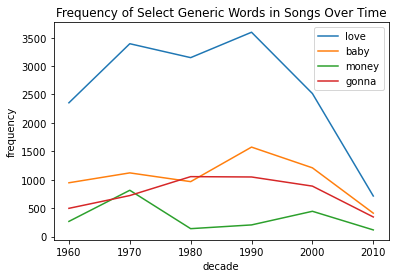

In [384]:
keywords = ["love","baby","money", "gonna"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of Select Generic Words in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

As a note, due to the 2010s having only 300 songs so far, its not very representative of that decade. I selected a few words that I noticed from personal experience showed up in songs frequently. As suspected, love is a common word found in songs of all decades, and the word _money_ having a peak during the 70's and _baby_ peaking in the 90's.

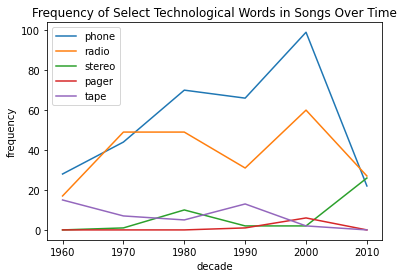

In [407]:
keywords = ["phone", "radio", "stereo", "pager", "tape"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of Select Technological Words in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

For this plot I selected key words related to technologies used in daily life and took a look at their frequency. Something interesting to note is the small peak during the 80's for the word _stereo_, and then a higher peak for the 2010's.  

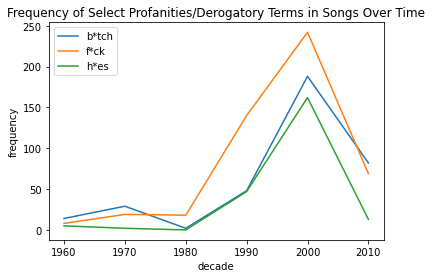

In [396]:
keywords = ["bitch","fuck", "hoes"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
censor = lambda x: x[0] + "*" + x[2:]
plt.legend([censor(i) for i in keywords])
plt.title("Frequency of Select Profanities/Derogatory Terms in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

When looking at frequency of profanities, we see a huge jump during the 2000s. I suspect that when I finish collecting data for the 2010s, I will see a similarly high peak. 

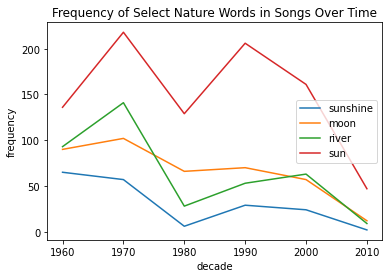

In [400]:
keywords = ["sunshine", "moon", "river", "sun"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of Select Nature Words in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

In the 80s we see a dip in words related to nature, and a general decrease since.

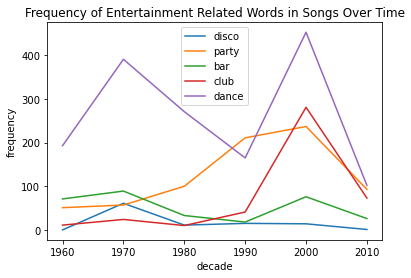

In [408]:
keywords = ["disco", "party", "bar", "club", "dance"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of Entertainment Related Words in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

The rise of _disco_ in the 70's is reflected in song lyrics of that time as we can see a small peak in our graph. We also see a large peak for _club_ and _party_ as we reach the 2000s. _Dance_ shows a large peak in both the 70's and 2000's. 

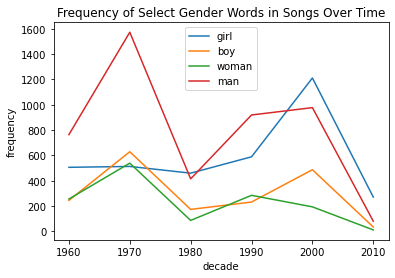

In [415]:
keywords = ["girl", "boy", "woman", "man"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of Select Gender Words in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

We can see from this graph that the most common method to refer to females seem to be _girl_, while for males, _man_. 

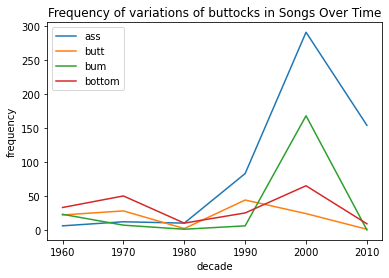

In [427]:
keywords = ["ass", "butt", "bum", "bottom"]
for i in keywords:
    plt.plot(list(range(1960,2020,10)), [j[i] for j in count_bydec])
plt.legend(keywords)
plt.title("Frequency of variations of buttocks in Songs Over Time")
plt.xlabel("decade")
plt.ylabel("frequency")
plt.show()

### Data Description ###
__What are the observations (rows) and the attributes (columns)?__ <br>
The attributes were the decade, and the count of words by decade.
Each observation (row) represents a decade, and the count of words is stored as Counter objects.<br>
__What processes might have influenced what data was observed and recorded and what was not?__<br>
Because the creators of the data (Billboard) isn't involved with the music itself, I feel that it's able to maintain a pretty objective perspective because its ranking is based on a public function of music popularity and cumulative sales. <br>
__What preprocessing was done, and how did the data come to be in the form that you are using?__<br>
I obtained this dataset by first scraping for the top 100 songs of each year from Billboard Hot 100. Using this, I scraped for the lyrics for each of these songs, and then grouped them by decade before finding the frequency fo each word.  

### Data Limitations ###
One limitation of my data is its size. Although I have 1000 songs per decade, that's really only 100 songs a year, which I feel like could have an impact on the results, so it would have been better if I could obtain more songs per year. I'm also still missing data for 2013-2019, so my 2010's data is still not representative of the decade. 

### Question for Reviewers ###
My data is pretty qualitative, so I'm having trouble with coming up with other analysis ideas other than the ones I have with comparing word frequency over time. I plan to also create a regression model that can predict decade based on lyrics, but other than that, what other analysis would you suggest?

How can I clarify my research question and make it better?

Any other improvements/suggestions/words to take a look at are welcomed :)